## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data =pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Checking the number of mice.
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combine_data.loc[combine_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_data


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data[combine_data['Mouse ID'].isin(duplicate_data)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Checking the number of mice in the clean DataFrame.
new_mice = clean_data["Mouse ID"].nunique()
new_mice

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
print(summary_stat)




              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [28]:
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
sum_agg =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
sum_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [35]:
mice_count = clean_data["Drug Regimen"].value_counts()
mice_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Treatment')

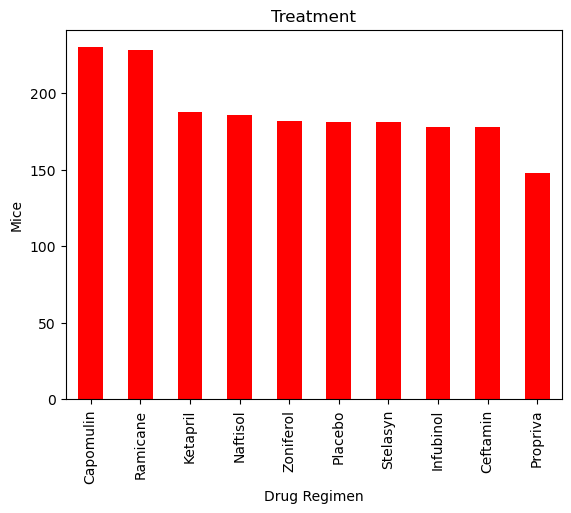

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot_pandas = mice_count.plot.bar(color='red')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.title("Treatment")


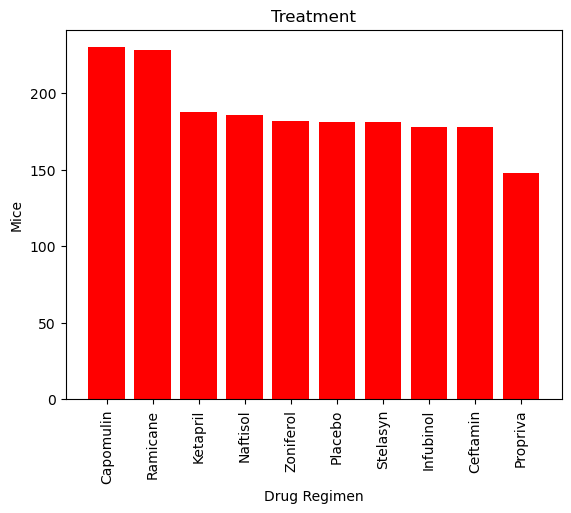

In [76]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values


plt.bar(x_axis, y_axis, color='red')

# Set the xlabel and ylabel, title using class methods
plt.title("Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.xticks(rotation=90)

plt.show()

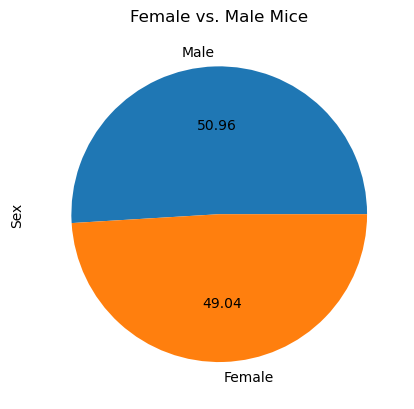

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_data = clean_data["Sex"].value_counts()
plt.title("Female vs. Male Mice")
sex_data.plot.pie(autopct= '%.2f')
plt.show()

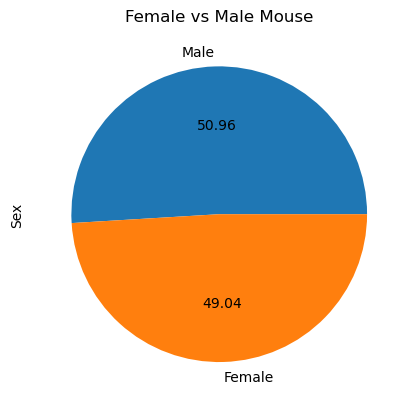

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = sex_data.plot.pie(y='Total Count', autopct='%.2f')
plt.title('Female vs Male Mouse')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [54]:
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [56]:
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [57]:
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

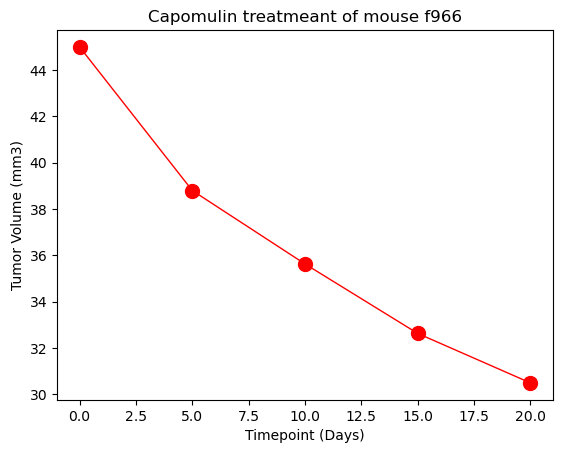

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "f966",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse f966')
plt.plot(x_axis, tumsiz,linewidth=1, markersize=10,marker="o",color="red", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

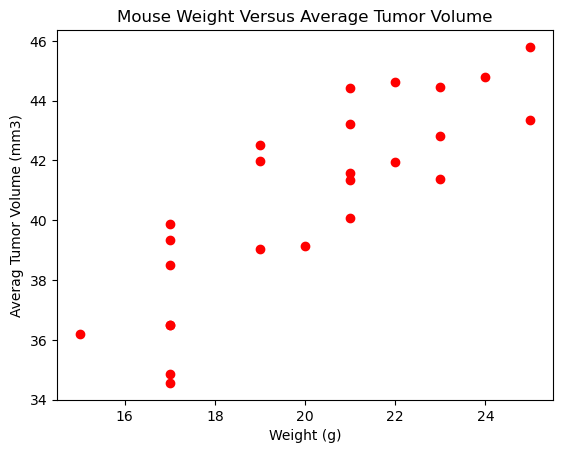

In [73]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="red")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [75]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84
